In [5]:
import pandas as pd 
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from umap import UMAP  # Make sure to install umap-learn
from scipy.stats import zscore
import numpy as np


In [6]:
df = pd.read_csv("/mnt/ncshare/ozkilim/BRCA/HGSOC_platinum_responce/HGSOC_TCGA_main.csv")

# prots = ['RAB25', 'BCL2L1', 'HADH', 'NFKB2', 'COX7A2', 'COX7C', 'TPMT', 'GOLPH3L', 'LTA4H', 'COX6C', 'IDH1', 'YWHAG', 'S100A10', 'COX6A1', 'NDUFB3', 'TGM2', 'CDKN1B', 'NFKB1', 'CAMK2D', 'IL4I1', 'FDX1', 'VCAM1', 'ATM', 'NCAPH2', 'ABCB8', 'IDI1', 'PLIN2', 'ATP6V1D', 'GPX4', 'CA2', 'RELA', 'GLUD1', 'TOP3B', 'RPS6KB2', 'KEAP1', 'LGALS1', 'MTDH', 'AIFM1', 'RHOA', 'CASP7', 'PTGES2', 'TFRC', 'CHUK', 'GPX1', 'PDK1', 'STAT3', 'PECR', 'TALDO1', 'XIAP', 'ACADSB', 'CPOX', 'ARNT', 'BIRC2', 'ACOT7', 'HACL1', 'MYD88', 'EGFR', 'RIPK1', 'NBN', 'LDHA']

prots = [col for col in df.columns if (col.isupper() or "orf" in col)]

prots_df = df[prots]
prots_df.head()
labels = df['label']
sites = df['Sample Source']

/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (5283,7094) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


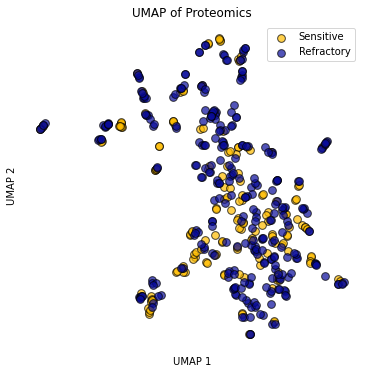

In [12]:
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(prots_df)
df_scaled = prots_df.copy()

# Apply PCA to reduce to 50 dimensions
pca = PCA(n_components=70)
principal_components_50d = pca.fit_transform(df_scaled)

z_scores = np.abs(zscore(principal_components_50d, axis=0))
mask = (z_scores > 0.001).all(axis=1)  # Only keep rows where all z_scores are < 3
principal_components_50d = principal_components_50d[mask]


# Apply UMAP to reduce further to 2 dimensions for visualization
umap_reducer = UMAP(n_components=2, random_state=42)
umap_embedding = umap_reducer.fit_transform(principal_components_50d)

# Create a new DataFrame for the UMAP components
df_umap = pd.DataFrame(data=umap_embedding, columns=['UMAP1', 'UMAP2'])
df_umap['Label'] = labels  # Assuming 'labels' are your data labels
df_umap['Sample Source'] = sites  # Assuming 'sites' categorizes the samples

# Visualize the data with colors based on the sample source
plt.figure(figsize=(6, 6))
for label in set(labels):
    idx = df_umap['Label'] == label
    if label == 1:
        responce = "Sensitive"
        c= "#FFBD00"
    else:
        responce = "Refractory"
        c="#090C9B"

    plt.scatter(df_umap.loc[idx, 'UMAP1'], df_umap.loc[idx, 'UMAP2'], label=responce, c=c,edgecolor='black', s=60,alpha=0.7)


# TODO plot alpha alrge fro signature and low for non and add some labels of interest..
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.xticks([])
plt.yticks([])

plt.title('UMAP of Proteomics')
plt.legend()
plt.savefig('../figures/proteins_umap.png', dpi=300, facecolor='white')  # or 'roc_curve.svg' for vector format
plt.show()

In [8]:
df['label'] = df['label'].map({1:'Sensitive', 0:'Refractory'})


# onto plot in bold the signatures... 
